In [1]:
from scipy import misc, ndimage
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
image = ndimage.imread('school.jpg', mode='I')
pattern = ndimage.imread('fish1.png', mode='I')

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


In [3]:
image.shape, pattern.shape

((720, 1280), (15, 38))

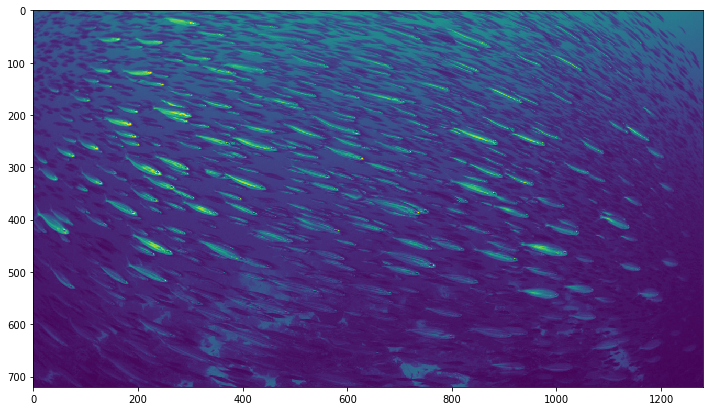

In [15]:
showImage(image)

In [14]:
def showImage(image):
    plt.figure(figsize = (12,12))
    plt.imshow(image)
    plt.show()

In [6]:
def getCorrelation(im, pat):
    pat = np.rot90(pat, 2)
    fp = np.fft.fft2(pat, im.shape)
    fi = np.fft.fft2(im)
    m = np.multiply(fp, fi)
    corr = np.fft.ifft2(m)
    corr = np.abs(corr)
    return corr

In [7]:
def proccesCorrelation(cor, d):
    m = np.amax(cor) * d
    for row in range(cor.shape[0]):
        for col in range(cor.shape[1]):
            if (cor[row][col] < m):
                cor[row][col] = 0
    return cor

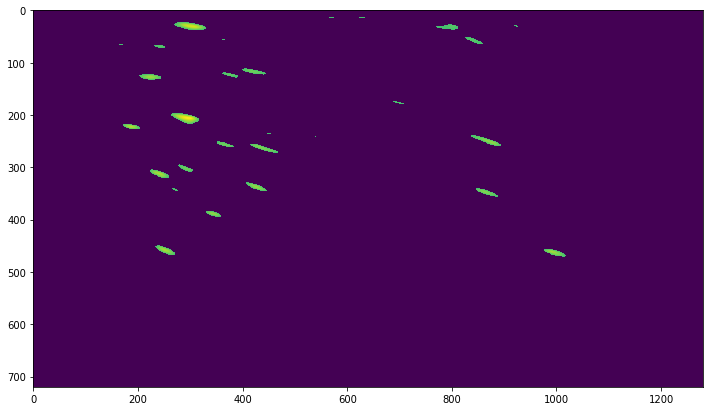

In [99]:
c = getCorrelation(image, pattern)
pc = proccesCorrelation(c, 0.7)
showImage(pc)

In [100]:
ndimage.find_objects(pc)

TypeError: integer argument expected, got float

## LETTERS

In [107]:
image2 = ndimage.imread('galia.png', mode='I')
pattern2 = ndimage.imread('galia_e.png', mode='I')
image2 = np.invert(image2)
pattern2 = np.invert(pattern2)

In [115]:
showImage(image2)

ValueError: Colormap cm.jet.blue is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

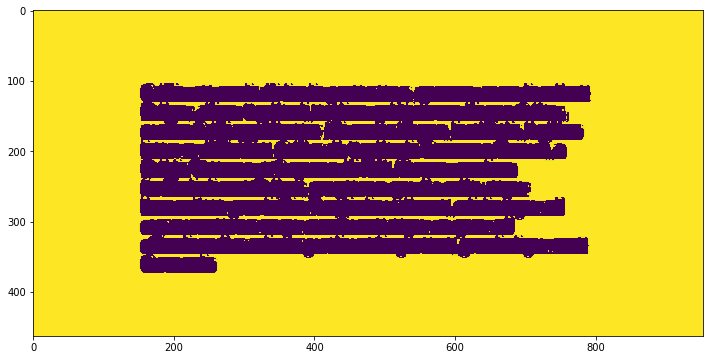

In [113]:
c = getCorrelation(image2, pattern2)
pc = proccesCorrelation(c, 0.95)
showImage(pc)